##Assignment 5: SVD based image compression


Name : VYOMKESH CHAUDHARY


Roll No. : 203070028






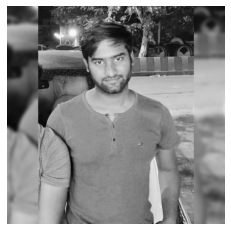

In [32]:
from matplotlib.image import imread         ##importing libraries
import matplotlib.pyplot as plt
import numpy as np

A = imread('/content/greyscale.png')         ##reading image file
X = np.mean(A,-1)                            ##Convert RGB to grayscale    
img = plt.imshow(X)                          ##displaying data as image
img.set_cmap('gray')                         ##setting the color for image
plt.axis('off')
plt.show()

In [35]:
X.shape

(1080, 1080)

In [36]:
U, S , VT = np.linalg.svd(X,full_matrices=False)          ##Running economy SVD using numpy
S = np.diag(S)                                            ##extacting S matrix in diagonal form

<BarContainer object of 500 artists>

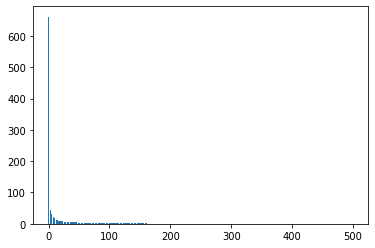

In [49]:
k = np.arange(0,500)           ##Checking for singular values
plt.bar(k,S[k,k])

<BarContainer object of 500 artists>

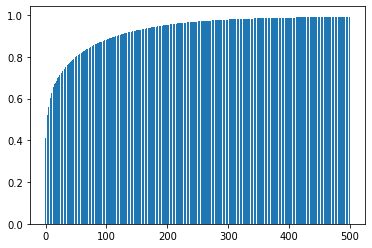

In [50]:
plt.bar(k,(np.cumsum(S[k,k]/np.sum(S))))            ##Cumulative Singular value

In [38]:
from matplotlib.pyplot import imshow            ##importing library

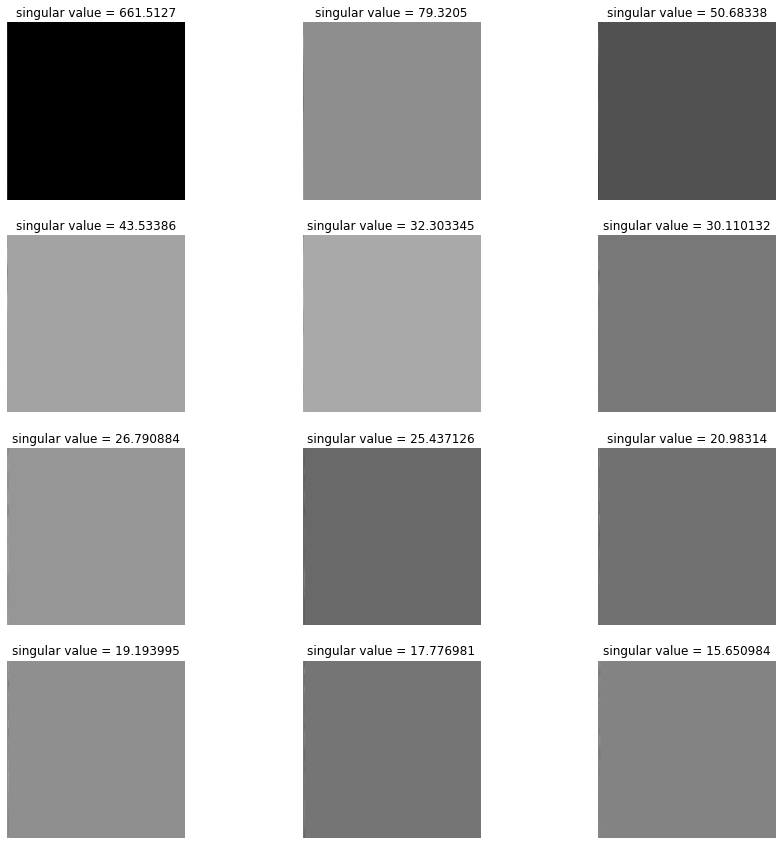

In [39]:
fig = plt.figure(figsize=(15, 15))           
rows=4
columns=3
for i in range(12):
    matrix = S[i]*np.outer(U[:,i],VT[i])                    ## 1 rank matrix corresponding to ith singular value
    fig.add_subplot(rows, columns, i+1)                     ## plotting images in rows and columns
    image1 = plt.imshow(matrix)
    image1.set_cmap('gray')
    plt.axis('off')
    plt.title('singular value = ' + str(S[i,i]))

plt.show()


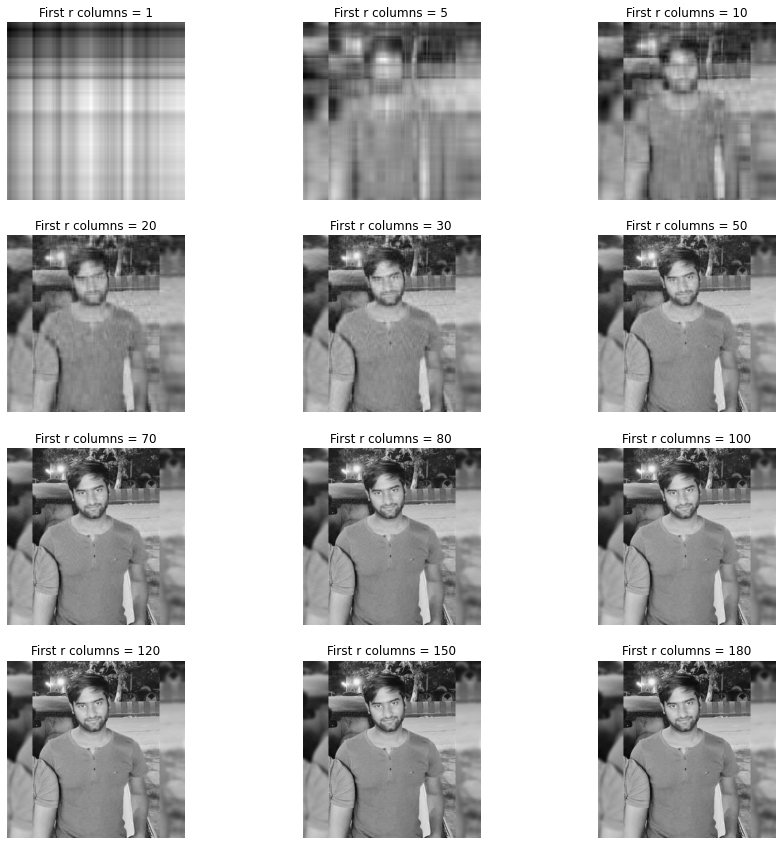

In [40]:
fig = plt.figure(figsize=(15, 15))
rows=4
columns=3
i=0
for r  in (1,5,10,20,30,50,70,80,100,120,150,180):                  ## considering only first rth singular values
  Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]                           ## computing approx matrix for A 
  fig.add_subplot(rows, columns, i+1)
  i += 1
  image = plt.imshow(Xapprox)
  image.set_cmap('gray')
  plt.axis('off')
  plt.title('First r columns = ' + str(r))
plt.show()

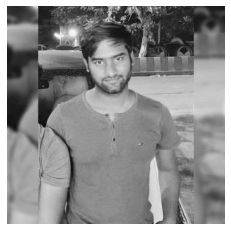

In [41]:
new= U[:,:120] @ S[:120,:120] @ VT[:120,:]                          ## saving image considering first 120 singular values
plt.imshow(new,cmap='gray')
plt.axis('off')
plt.savefig('reconstructed_image_with_5_SVs.png',dpi=150, figsize=(15,15))